# Step 1-4:
## Step 1: load covid-19 data.
## Step 2: filter and aggregate covid-19 cases for new york.
## Step 3: calculate and print distribution statistics (mean, variance) for new york.
## Step 4: fit and plot negative binomial distributions for new york and five other states.

mean of total cases: 67246444.5
variance of total cases: 1.5772075467975952e+16
probability of success (p_nb): 4.263639534095497e-09
number of failures (r_nb): 0.28671460052000636


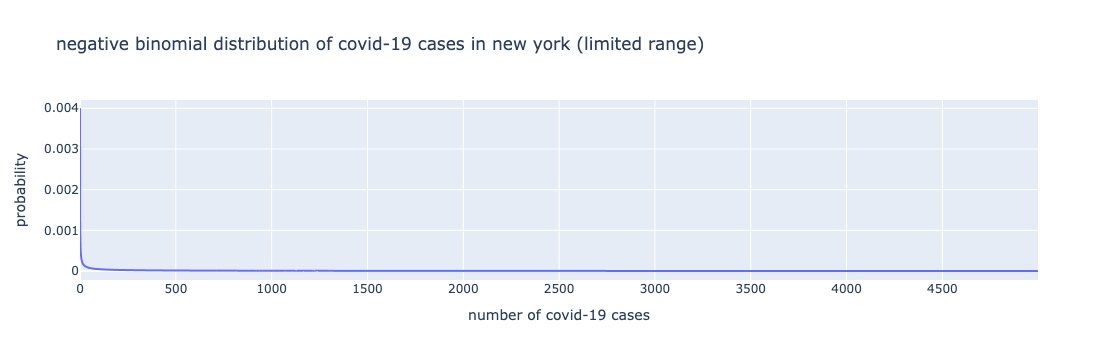

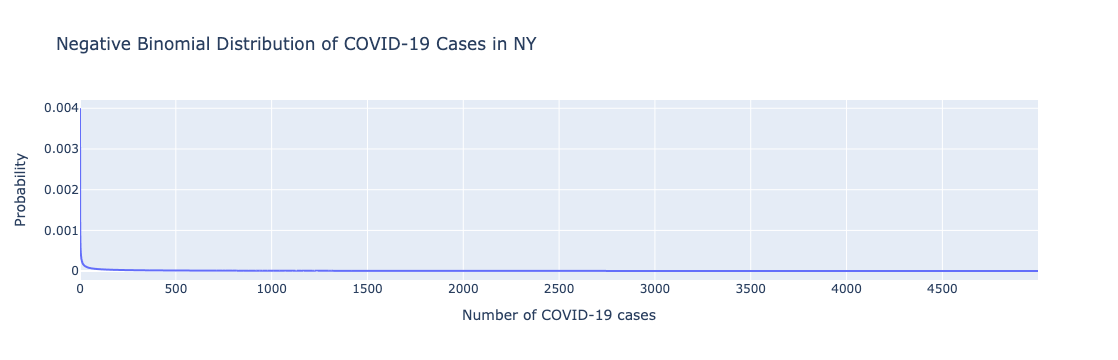

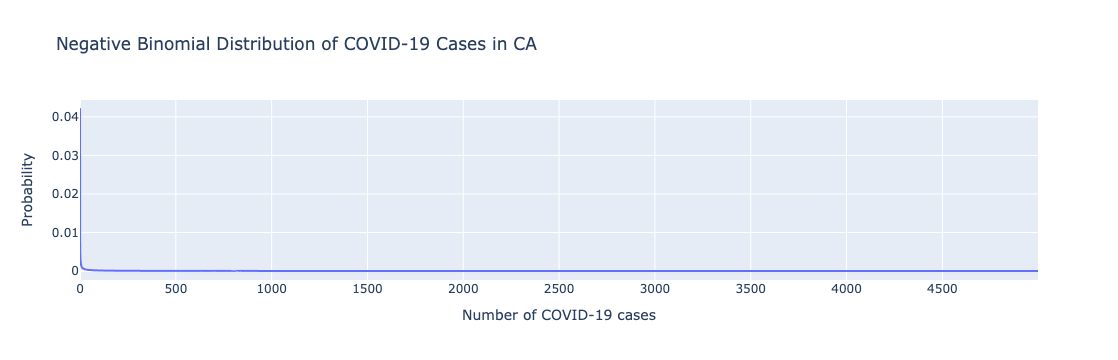

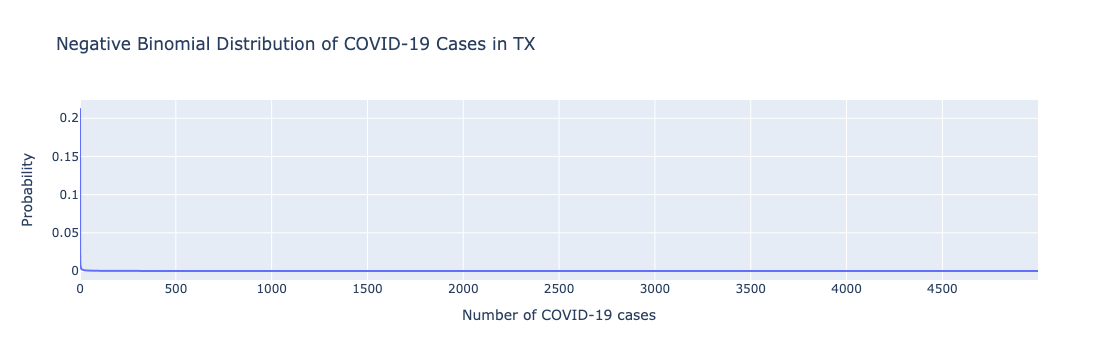

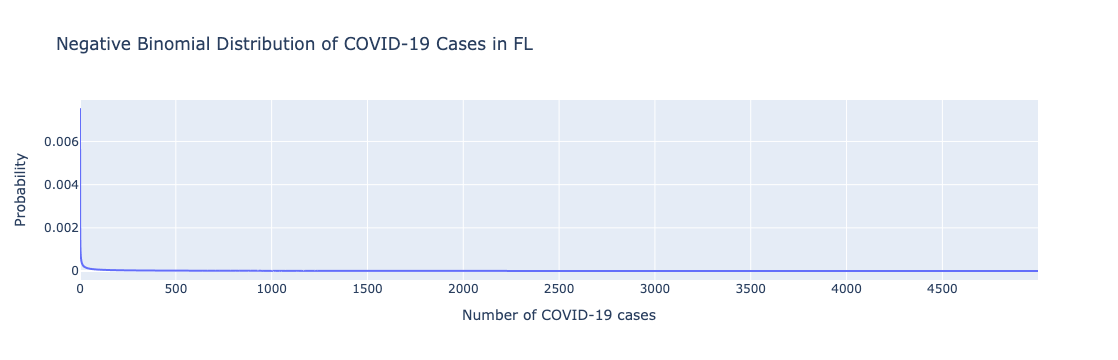

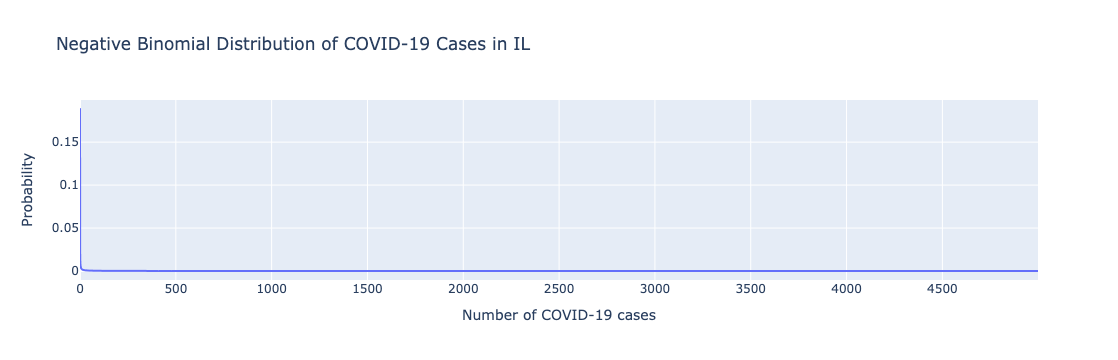

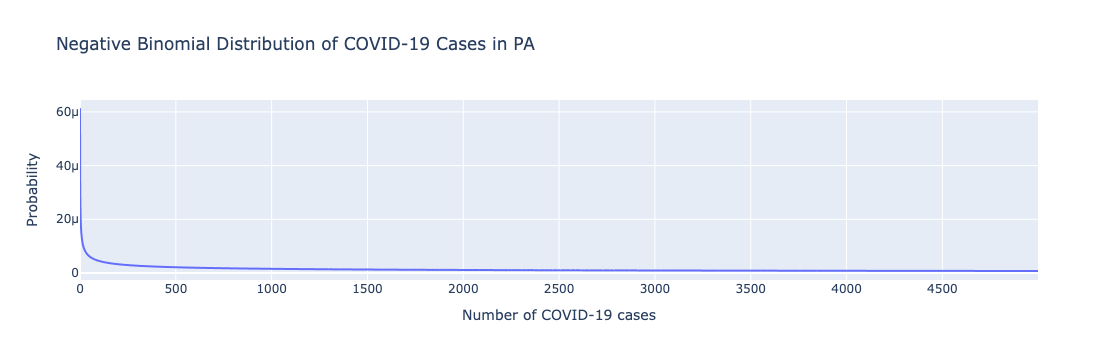

NY - mean: 67246444.5, variance: 1.5772075467975952e+16, p_nb: 4.263639534095497e-09, r_nb: 0.28671460052000636
CA - mean: 123591897.1724138, variance: 9.881303621655997e+16, p_nb: 1.2507651004827758e-09, r_nb: 0.15458443187905987
TX - mean: 21469827.59448819, variance: 5770400794685731.0, p_nb: 3.7206822122756005e-09, r_nb: 0.0798824059286531
FL - mean: 72638144.64179105, variance: 2.1011243818217144e+16, p_nb: 3.4571082640434834e-09, r_nb: 0.25111793099406354
IL - mean: 22861547.529411763, variance: 6077131464244421.0, p_nb: 3.761897807200748e-09, r_nb: 0.08600280584364357
PA - mean: 33810257.97014926, variance: 2114810258828473.2, p_nb: 1.5987371835844455e-08, r_nb: 0.5405371746763685


In [33]:
import pandas as pd
import numpy as np
from scipy.stats import nbinom
import plotly.express as px
import os
#step 1
# loading covid data 
data_folder_path = '~/Desktop/sara stage 3'
covid_data_path = os.path.join(data_folder_path, 'final_merged_data.csv')

# loading the csv file
covid_data = pd.read_csv(covid_data_path)

# step 2: filtering and aggregate covid case counts for new york
new_york_data = covid_data[covid_data['State'] == 'NY'].copy()
case_columns = [col for col in new_york_data.columns if '_cases' in col]

# sum the case counts across all dates for each county in new york
new_york_data.loc[:, 'total_cases'] = new_york_data[case_columns].sum(axis=1)

# step 3: printing mean and variance for new york's covid cases
mean_cases_ny = np.mean(new_york_data['total_cases'])
var_cases_ny = np.var(new_york_data['total_cases'])

print(f"mean of total cases: {mean_cases_ny}")
print(f"variance of total cases: {var_cases_ny}")

p_nb = mean_cases_ny / var_cases_ny  # probability of success
r_nb = mean_cases_ny**2 / (var_cases_ny - mean_cases_ny)  # number of failures

print(f"probability of success (p_nb): {p_nb}")
print(f"number of failures (r_nb): {r_nb}")

# step 3: plotting the negative binomial distribution for new york
case_values_ny = np.arange(0, 5000, 1)
pmf_nb = nbinom.pmf(case_values_ny, r_nb, p_nb)
fig = px.line(x=case_values_ny, y=pmf_nb, labels={'x': 'number of covid-19 cases', 'y': 'probability'},
              title='negative binomial distribution of covid-19 cases in new york (limited range)')
fig.show()

# step 4: fitting and plotting the negative binomial distribution for New York and other states
comparison_states = ['NY', 'CA', 'TX', 'FL', 'IL', 'PA']
state_stats = {}

#  data for each state
for state in comparison_states:
    state_data = covid_data[covid_data['State'] == state].copy()

    # aggregate case counts 
    case_columns_state = [col for col in state_data.columns if '_cases' in col]
    state_data.loc[:, 'total_cases'] = state_data[case_columns_state].sum(axis=1)

    # removing rows with missing or zero values for total cases (to avoid NaN or constant values)
    state_data = state_data[state_data['total_cases'].notna() & (state_data['total_cases'] > 0)]

    # checking if there are enough data points to calculate mean and variance
    if len(state_data) < 2:
        print(f"Not enough data to calculate for {state}. Skipping...")
        continue

    # calc mean and variance 
    mean_cases_state = np.mean(state_data['total_cases'])
    var_cases_state = np.var(state_data['total_cases'])

    # checkin for zero variance which causes NaN in negative binomial calculation
    if var_cases_state == mean_cases_state:
        print(f"Variance equals the mean for {state}. Skipping negative binomial calculation.")
        continue

    # fitting the negative binomial distribution
    p_nb_state = mean_cases_state / var_cases_state
    r_nb_state = mean_cases_state**2 / (var_cases_state - mean_cases_state)

    # saving statistics 
    state_stats[state] = {'mean': mean_cases_state, 'variance': var_cases_state, 'p_nb': p_nb_state, 'r_nb': r_nb_state}

    # plotting the negative binomial distribution for the state
    case_values_state = np.arange(0, 5000, 1)  # Range is kept wide as per your original approach
    pmf_nb_state = nbinom.pmf(case_values_state, r_nb_state, p_nb_state)
    
    fig_state = px.line(x=case_values_state, y=pmf_nb_state,
                        labels={'x': 'Number of COVID-19 cases', 'y': 'Probability'},
                        title=f'Negative Binomial Distribution of COVID-19 Cases in {state}')
    
    fig_state.show()

# printing stats
for state, stats in state_stats.items():
    print(f"{state} - mean: {stats['mean']}, variance: {stats['variance']}, p_nb: {stats['p_nb']}, r_nb: {stats['r_nb']}")


In steps 1-4, I started by loading the COVID-19 data for New York and combining the case counts for each county which gave me the total number of covid cases for each county in New York. After I calculated the average (mean) number of total cases, which came out to be around 67 million, and I also calculated the variance, which was really large (1.577e+16). The large variance shows that there is a big difference in the number of cases between counties.

Next, I used this information to fit a negative binomial distribution to the data, which helps in modeling count data like covid cases, especially when there’s a lot of variation which there was. The plot for New York showed that most counties had lower case numbers, but a few counties with high cases pulled the variance up. The graph had a sharp drop in probability and then stayed flat for larger case numbers, which was expected.

I then did the same process for five other states: California, Texas, Florida, Illinois, and Pennsylvania. Even though the total number of cases and the variance were different for each state, the negative binomial distribution graphs all looked very similar. This is because all the states had a few counties with really high case counts and most with lower counts, which made the data very spread out (high variance). Since the data was similar in this way, the distributions ended up looking almost the same across the states.

At the end, the reason the graphs all look very similar is because, in each state, the covid cases are not evenly spread out. Most counties have low numbers of cases, while a few have really high numbers. This makes the data for each state behave the same way, even if the actual number of cases is different. The negative binomial distribution is used because it handles this kind of situation well where there’s a lot of variation. That’s why all the graphs have a drop in probability at the start and then stay flat for larger numbers of cases. This pattern happens because there are only a few counties with really high numbers, so the chances of seeing large case counts are low, but the few that do have high numbers make the variance large.

The p_nb (probability of success) values were very small for all the states. This happened because the variance was much larger than the mean, which means the data is very spread out. When there’s this much spread, especially in large datasets like covid cases, it’s expected to see small probabilities of success. This just shows that there is a lot of difference in case counts across counties. For the r_nb (number of failures) values, they were also small except for Pennsylvania, which had a higher value. which means like p_nb, the data has a lot of variation, so the number of failures before success is small in most cases.

The very high variances explain why both p_nb and r_nb are so small. This is to the large jumps in case numbers between counties and over time. Adding up case counts over long periods can make these variances even bigger.  the distributions plotted end up looking flat and stretched out, with a  drop at the start and a long flat tail as you can see. This is because most counties don’t have many cases, but a few have a lot, so the chance of seeing very high numbers of cases is small but still possible.



## Step 5: fit poisson and negative binomial distributions for each state and plot the results.

in step 5, I started by filtering the data to get the total number of cases and deaths for each state. Then, I calculated the average number of cases and the variance, which are important for figuring out how to set up the distributions. Once I had that, I plotted the probability mass functions (PMFs) for both the Poisson and Negative Binomial distributions. This allowed me to visualize how likely it was to see different numbers of covid cases and deaths in each state.

When looking at the results, I noticed that the graphs for all the states followed a similar pattern. The probability dropped really fast for low numbers of cases and then stayed pretty flat for larger numbers. This makes sense because, in all of the states, most counties had low numbers of cases, while only a few had very high numbers. This caused the data to be really spread out, which led to the drop and flattening in the graphs. The same thing happened for deaths as well.

For New York, the graph showed this sharp drop and flatline, which means that most counties had lower case numbers, but a few had very high case counts. California’s graph was almost the same, with a sharp drop and a flatline, a similar spread in the data. Texas also had the same trend, where a few counties with high cases caused the graph to behave this way. Florida, Illinois, and Pennsylvania followed the same pattern, with the graphs for all of them looking almost identical. This shows that in all of these states, the cases and deaths were not evenly spread out, and most of the data came from just a few counties with high numbers.

In the end, the reason the graphs all look similar is because, in each state, the covid cases and deaths are concentrated in just a few counties. Most counties had low numbers, while a few had much higher numbers, causing the data to be very spread out (high variance). Both the Poisson and Negative Binomial distributions captured this pattern, but the Negative Binomial distribution did a better job because it can handle the large variance more effectively. That’s why the graphs showed a deep drop at the beginning and then flattened out, as only a few counties had high numbers. Even though the total number of cases and deaths differed from state to state, this spread in the data was the same across all six states, which is why the graphs ended up looking almost identical.

In [6]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
import os

# paths
data_folder_path = '~/Desktop/sara stage 3'
covid_data_path = os.path.join(data_folder_path, 'final_merged_data.csv')
covid_data = pd.read_csv(covid_data_path)

# filtering for New York 
ny_data = covid_data[covid_data['State'] == 'NY']

# reshaping COVID cases data
ny_cases_melted = ny_data.melt(
    id_vars=['countyFIPS', 'County Name', 'State', 'population'],
    value_vars=[col for col in ny_data.columns if '_cases' in col and 'StateFIPS' not in col],
    var_name='date',
    value_name='cases'
)
ny_cases_melted['date'] = ny_cases_melted['date'].str.replace('_cases', '')

# reshaping COVID deaths data
ny_deaths_melted = ny_data.melt(
    id_vars=['countyFIPS', 'County Name', 'State', 'population'],
    value_vars=[col for col in ny_data.columns if '_deaths' in col and 'StateFIPS' not in col],
    var_name='date',
    value_name='deaths'
)
ny_deaths_melted['date'] = ny_deaths_melted['date'].str.replace('_deaths', '')

# converting the date column to datetime format
ny_cases_melted['date'] = pd.to_datetime(ny_cases_melted['date'])
ny_deaths_melted['date'] = pd.to_datetime(ny_deaths_melted['date'])

# merging the cases and deaths data on countyFIPS, County Name, State, and population
ny_merged_long_data = pd.merge(ny_cases_melted, ny_deaths_melted, on=['countyFIPS', 'County Name', 'State', 'population', 'date'])

# normalixing the COVID cases and deaths per 100,000 people
ny_merged_long_data['cases_per_100k'] = (ny_merged_long_data['cases'] / ny_merged_long_data['population']) * 100000
ny_merged_long_data['deaths_per_100k'] = (ny_merged_long_data['deaths'] / ny_merged_long_data['population']) * 100000

# loading the presidential dataset
elections_folder = '~/Desktop/sara stage 3/presidential elections'
president_county_path = os.path.join(elections_folder, 'president_county.csv')
president_county_data = pd.read_csv(president_county_path)

# filtering for New York state
ny_election_data = president_county_data[president_county_data['state'] == 'New York']

# renaming county column to match with the other dataset
ny_election_data = ny_election_data.rename(columns={'county': 'County Name'})

#  normalizing county names to lower case and strip whitespace for merging
ny_merged_long_data['County Name'] = ny_merged_long_data['County Name'].str.strip().str.lower()
ny_election_data['County Name'] = ny_election_data['County Name'].str.strip().str.lower()

# merging COVID data and election data on County Name
merged_data = pd.merge(ny_merged_long_data, ny_election_data[['County Name', 'percent']], on='County Name', how='inner')

# pearson correlation between voter turnout percentage and COVID-19 cases per 100,000 people
corr, _ = pearsonr(merged_data['percent'], merged_data['cases_per_100k'])
print(f"Pearson correlation between voter turnout and COVID-19 cases per 100,000 people: {corr}")

# OLS regression: voter turnout percentage vs. COVID-19 cases per 100,000
X = merged_data['percent']  # Voter turnout percentage
y = merged_data['cases_per_100k']  # COVID-19 cases per 100,000 people

# constant to the independent variable
X = sm.add_constant(X)

#  OLS model
model = sm.OLS(y, X).fit()

# printing
print(model.summary())

Pearson correlation between voter turnout and COVID-19 cases per 100,000 people: nan
                            OLS Regression Results                            
Dep. Variable:         cases_per_100k   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 19 Oct 2024   Prob (F-statistic):                nan
Time:                        20:12:24   Log-Likelihood:            -8.4360e+05
No. Observations:               78430   AIC:                         1.687e+06
Df Residuals:                   78429   BIC:                         1.687e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

/var/folders/jc/kjzx_rm53kdf892bp0rhcz200000gn/T/ipykernel_94526/220991243.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(merged_data['percent'], merged_data['cases_per_100k'])


In Step 6, I started by choosing the presidential dataset from my Stage 1 work as the first enrichment variable to compare against COVID-19 cases. The goal was to explore if there was a relationship between voter turnout and covid cases per 100,000 people in different counties in New York. My hypothesis was that counties with higher voter turnout might have fewer covid cases. The idea behind this was that people who are more engaged in voting might also be more likely to follow public health guidelines, such as wearing masks and practicing social distancing.

 I first merged the voter turnout data with the covid case data for New York. I adjusted the case numbers by population to show the number of cases per 100,000 people in each county, making it easier to compare counties of different sizes. After preparing the data, I calculated the Pearson correlation to check for any relationship between voter turnout and COVID-19 cases.

but the correlation result came back as "NaN" (not a number). This happened because the voter turnout was the same (100%) for every county, so there was no variability in the data( i got this info from stage 1). Since correlation requires variability in both variables being compared, it wasn’t possible to find a relationship. The no variation in voter turnout made it impossible to see if higher turnout had any effect on COVID-19 cases.

I also ran a regression analysis to try and model the relationship between voter turnout and covid cases per 100,000 people. But again, because the voter turnout data was constant, the regression didn’t produce any useful results. The regression could not give meaningful insights due to the no variation, which left nothing to analyze in the data.

Hypothesis Conclusion:
My hypothesis, that counties with higher voter turnout might have fewer covid cases, couldn’t be tested because there was no variation in voter turnout across the counties. Without any differences in voter turnout data, it was impossible for conclusions about whether there was a connection between voter turnout and covid cases. 





/var/folders/jc/kjzx_rm53kdf892bp0rhcz200000gn/T/ipykernel_37747/2610513448.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_selected_data['County Name'] = employment_selected_data['Area'].apply(lambda x: x.split(",")[0].replace("county", "").strip().lower())


Number of rows after merge: 5641
   countyFIPS    County Name State  StateFIPS_cases  2020-01-22_cases  \
0       36001  albany county    NY               36                 0   
1       36001  albany county    NY               36                 0   
2       36001  albany county    NY               36                 0   
3       36001  albany county    NY               36                 0   
4       36001  albany county    NY               36                 0   

   2020-01-23_cases  2020-01-24_cases  2020-01-25_cases  2020-01-26_cases  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   2020-01-27_cases  ...  2023-07-19_deaths  2023-07-20_deaths  \

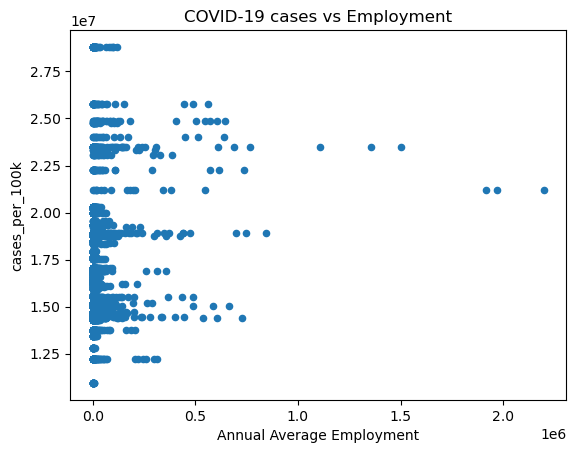

In [35]:
import pandas as pd
import numpy as np
import os

# path
data_folder_path = '~/Desktop/sara stage 3'
covid_data_path = os.path.join(data_folder_path, 'final_merged_data.csv')
ny_covid_data = pd.read_csv(covid_data_path)
ny_covid_data = ny_covid_data[ny_covid_data['State'] == 'NY']

# loading employment data
employment_data = pd.read_excel('employment_data/allhlcn20.xlsx')

# columns for employment data
employment_selected_data = employment_data[['Area', 'Annual Average Employment', 'Annual Average Pay']]

# standardize county names 
ny_covid_data['County Name'] = ny_covid_data['County Name'].str.replace('county', '').str.strip().str.lower()

# extracting just the county name from the 'Area' column 
employment_selected_data['County Name'] = employment_selected_data['Area'].apply(lambda x: x.split(",")[0].replace("county", "").strip().lower())

# making total cases column
case_columns = [col for col in ny_covid_data.columns if '_cases' in col]
ny_covid_data['total_cases'] = ny_covid_data[case_columns].sum(axis=1)

# merging
merged_data = pd.merge(ny_covid_data, employment_selected_data, on='County Name', how='inner')

print(f"Number of rows after merge: {len(merged_data)}")
print(merged_data.head())

# normalizing covid cases by population per 100,000 people
merged_data['cases_per_100k'] = (merged_data['total_cases'] / merged_data['population']) * 100000

# pearson correlation between employment and covid cases per 100,000 people
from scipy.stats import pearsonr
corr_employment, _ = pearsonr(merged_data['Annual Average Employment'], merged_data['cases_per_100k'])
print(f"Pearson correlation between Employment and COVID-19 cases per 100,000 people: {corr_employment}")

# OLS regression: employment vs. covid cases per 100,000
import statsmodels.api as sm
X = merged_data['Annual Average Employment']  # Employment data
y = merged_data['cases_per_100k']  # COVID-19 cases per 100,000

# constant to the independent var
X = sm.add_constant(X)

# OLS model
model = sm.OLS(y, X).fit()

print(model.summary())

# plotting the results
import matplotlib.pyplot as plt
merged_data.plot(x='Annual Average Employment', y='cases_per_100k', kind='scatter', title='COVID-19 cases vs Employment')
plt.show()


part 2: in Step 6, I chose employment data as my second enrichment variable to compare against covid cases in New York. My hypothesis was that counties with higher employment numbers might have more covid cases because more people working could lead to more interactions and, therefore, higher chances of spreading the virus.

I merged the employment data with the covid case data for New York, adjusting the case numbers to show covid cases per 100,000 people in each county. This easier comparisons between counties of different sizes. I calculated the Pearson correlation to see if there was any relationship between employment levels and covid cases.

The Pearson correlation showed a weak positive relationship (0.156), meaning that counties with higher employment had slightly higher covid cases, but the connection was not strong. I also ran a regression analysis, which showed that employment had a small impact on covid cases, but the overall explanation (R-squared) was very low, meaning employment alone doesn’t explain much of the variation in covid cases.

Hypothesis Conclusion: My hypothesis, that higher employment might be related to higher covid cases, was weakly supported by the data, but the relationship was not significant enough to draw strong conclusions. Other factors likely have a larger impact on covid cases, and employment alone isn't enough to explain the differences in case numbers between counties.

part 3: i chose the acs housing and demographic data as my third enrichment variable, I tried to find a relationship between age demographics and covid cases in New York counties. My initial idea was that counties with a higher proportion of young people might have fewer covid cases per 100,000 people. but I faced some challenges with the dataset that made it hard to get results.

first attempt i did : Proportion of Young People (Ages 0-24)
I started by calculating the proportion of young people (ages 0-24) in each county. I wanted to compare counties with low and high proportions of young people to see if there was a connection with covid cases. However, the results didn’t work because the data didn’t vary much between counties. This meant there wasn’t enough difference to compare, so I couldn’t run meaningful statistical tests.

attempt for broadening the age group: Ages 0-44 
I tried expanding the age group to include people aged 0-44 to see if this would add more variation. I thought a range bigger might show some differences between counties. Unfortunately, the data was still too similar across counties, so the results were the same, no real variation to analyze.

final attempt i did : Median Age
Then, I decided to look at median age to see if older counties had more COVID-19 cases. The idea was that older populations might be more affected by the virus. However, the median age data was also too similar across counties, which meant I couldn’t do much with it.

Conclusion: 
In the end, I tried several different approaches,looking at young people, broadening the age group, and using median age but the dataset didn’t have enough variation to get meaningful results. The lack of differences between counties made it impossible to find any patterns or trends in the data. and it was difficult to use the different datasets because of how other group members did their work so it took alot of time to analyze and undertsand their work. Overall i didnt get anything useful in this project stage III from the graphs looking the same to the enrichment variables not giving me useful results i did not enjoy it.



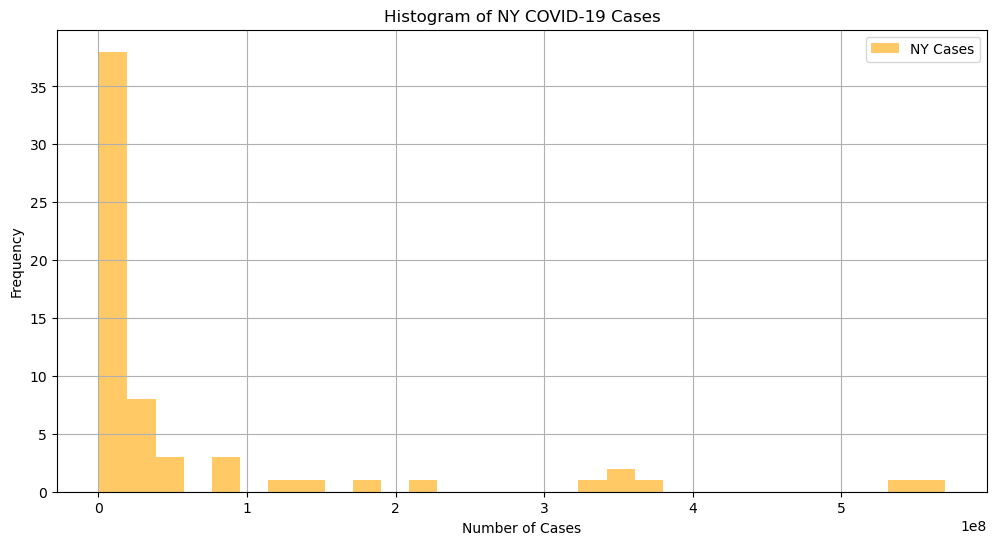

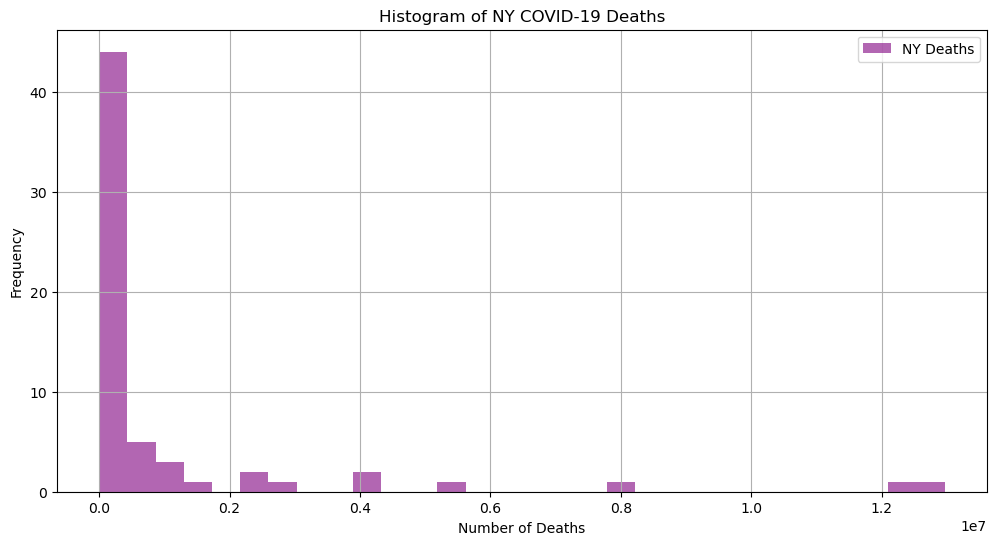

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the dataset from your specified path
data_folder_path = '~/Desktop/405 project/sara stage 3'
covid_data_path = os.path.join(data_folder_path, 'final_merged_data.csv')
covid_data = pd.read_csv(covid_data_path)
# Filter data for New York
new_york_data = covid_data[covid_data['State'] == 'NY'].copy()

# Aggregate case counts for New York
case_columns = [col for col in new_york_data.columns if '_cases' in col]
new_york_data['total_cases'] = new_york_data[case_columns].sum(axis=1)

# Aggregate death counts for New York
death_columns = [col for col in new_york_data.columns if '_deaths' in col]
new_york_data['total_deaths'] = new_york_data[death_columns].sum(axis=1)

# Remove any zero or negative values for better visualization
new_york_data = new_york_data[(new_york_data['total_cases'] > 0) & (new_york_data['total_deaths'] > 0)]

# Plotting histogram for cases
plt.figure(figsize=(12, 6))
plt.hist(new_york_data['total_cases'], bins=30, alpha=0.6, color='orange', label='NY Cases')
plt.title('Histogram of NY COVID-19 Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plotting histogram for deaths
plt.figure(figsize=(12, 6))
plt.hist(new_york_data['total_deaths'], bins=30, alpha=0.6, color='purple', label='NY Deaths')
plt.title('Histogram of NY COVID-19 Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

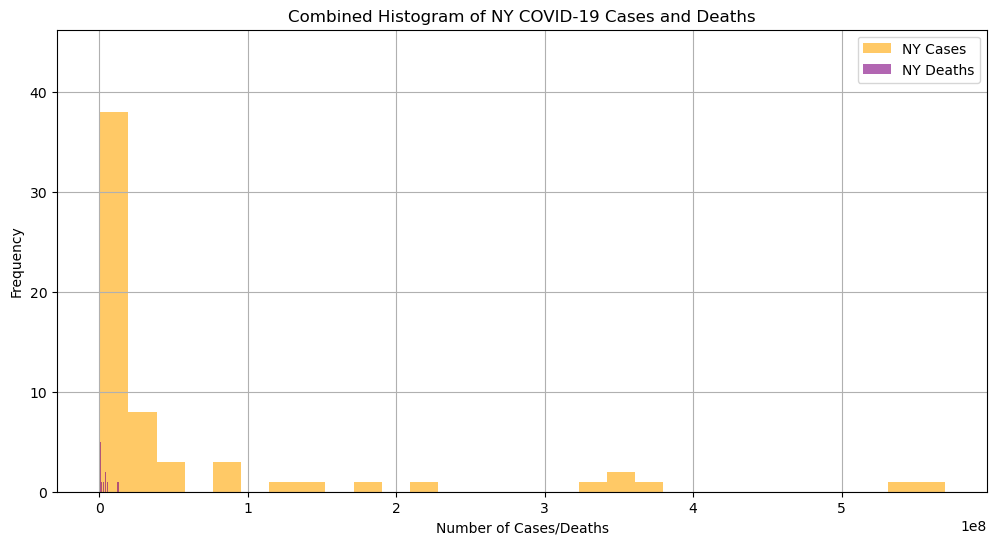

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the dataset from your specified path
data_folder_path = '~/Desktop/405 project/sara stage 3'
covid_data_path = os.path.expanduser(os.path.join(data_folder_path, 'final_merged_data.csv'))
covid_data = pd.read_csv(covid_data_path)

# Filter data for New York
new_york_data = covid_data[covid_data['State'] == 'NY'].copy()

# Aggregate case counts for New York
case_columns = [col for col in new_york_data.columns if '_cases' in col]
new_york_data['total_cases'] = new_york_data[case_columns].sum(axis=1)

# Aggregate death counts for New York
death_columns = [col for col in new_york_data.columns if '_deaths' in col]
new_york_data['total_deaths'] = new_york_data[death_columns].sum(axis=1)

# Plotting the combined histogram for cases and deaths
plt.figure(figsize=(12, 6))
plt.hist(new_york_data['total_cases'], bins=30, alpha=0.6, color='orange', label='NY Cases')
plt.hist(new_york_data['total_deaths'], bins=30, alpha=0.6, color='purple', label='NY Deaths')
plt.title('Combined Histogram of NY COVID-19 Cases and Deaths')
plt.xlabel('Number of Cases/Deaths')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
